In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [10]:
with open("first_database.pkl", "rb")as f:
    dataX,dataY=pickle.load(f)

In [ ]:
# parameters
n = 100
m = 10
a = 5
sigma = 0.5
nu = 1.0
beta = 0.1

In [12]:
sel = list(range(n))
ind = np.random.choice(sel,m,replace=False)
x_selected = dataX[ind] # ids_M
ind

array([58, 73, 11, 66, 35, 55, 87, 12, 46, 82])

In [13]:
from kernel import kernel_matrix
Kmm = kernel_matrix(dataX, ind, ind)
Knm = kernel_matrix(dataX, sel, ind)

In [14]:
from graph_tools import *

In [17]:
sel_copy = np.arange(n)
np.random.shuffle(sel_copy)
agents = np.array_split(sel_copy, 5)

In [18]:
import networkx as nx

step_size = 0.002
step_count = 1000

G = nx.path_graph(a)
print(G.edges())

[(0, 1), (1, 2), (2, 3), (3, 4)]


In [ ]:
x_i = np.zeros((step_count+1, a, m))
y_ij = np.zeros((step_count+1, a, a, m))
lambda_ij = np.zeros((step_count+1, a, a, m))

Kim = [Knm[ids_agent,:] for ids_agent in agents]

for step in range(step_count):
    for agentId in range(a):
        A = sigma**2*Kmm + Kim[agentId].T@Kim[agentId] + nu*np.eye(m)
        b = Kim[agentId].T@dataY
        for (_, j) in G.edges(agentId):
            b += beta*y_ij[step, agentId, j, :] - lambda_ij[step, agentId, j, :]
        x_i[step+1, agentId, :] = np.linalg.solve(A, b)
    for (i,j) in G.edges():
        y_ij[step+1, i, j, :] = \
        y_ij[step+1, j, i, :] = (x_i[step+1, i, :] + x_i[step+1, j, :])/2
        lambda_ij[step+1, i, j, :] = lambda_ij[step, i, j, :] + beta*(x_i[step+1, i, :] - y_ij[step+1, i, j, :]) 
        lambda_ij[step+1, j, i, :] = lambda_ij[step, j, i, :] + beta*(x_i[step+1, j, :] - y_ij[step+1, j, i, :]) 

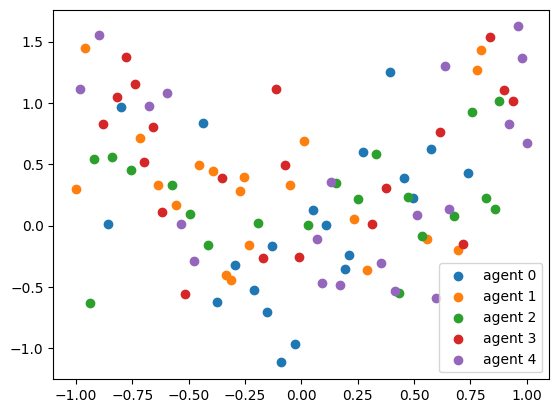

In [ ]:
from kernel import calc_f

# plt.scatter(x[sel], y[sel])
for i in range(a):
    plt.scatter(dataX[agents[i]], dataY[agents[i]], label="agent %d"%(i))


nt = 250
x_linspace = np.linspace(-1, 1, nt)
for s in range(0, step_count+1, step_count // 5):
    pred = [calc_f(v, x_i[s, 0, :]) for v in x_linspace]
    plt.plot(x_linspace, pred, label="step %d" % s)

plt.legend()
plt.show()